In [16]:
import sys
import os
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose

from src.experiments.FlipFlop import FlipFlop

from src.experiments.FitnessByStateSize import FitnessByStateSize
from src.experiments.FitnessLearningCurve import FitnessLearningCurve
from src.experiments.FitnessValidationCurve import FitnessValidationCurve
from src.experiments.EvalOptimizationAlgorithm import EvalOptimizationAlgorithm


from src.models.MIMIC import MIMIC
from src.models.GeneticAlgorithm import GeneticAlgorithm
from src.models.SimulatedAnnealing import SimulatedAnnealing
from src.models.RandomizedHillClimbing import RandomizedHillClimbing

from src.plots.FitnessComparison import FitnessComparison
from src.plots.FitnessValidationCurve import FitnessValidationCurve as FitnessValidationCurvePlot
from src.plots.OptimizationFitTimes import OptimizationFitTimes
from src.plots.FuncCallsByStateSizeComparison import FuncCallsByStateSizeComparison
from src.plots.FitnessCurve import FitnessCurve


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
rand_hill_climb = RandomizedHillClimbing(
    max_attempts=1000, 
    restarts=1, 
    max_iters=np.inf
)
sim_ann = SimulatedAnnealing(
    max_attempts=80, 
    schedule=mlrose.ExpDecay(init_temp=5, exp_const=1.0, min_temp=0.0001),
    max_iters=np.inf
)
gen_alg = GeneticAlgorithm(
    max_attempts=15, 
    mutation_prob=0.01, 
    population_size=250, 
    max_iters=np.inf
)
mimic = MIMIC(
    max_attempts=4,
    population_size=100, 
    keep_pct=0.2,
    max_iters=np.inf
)

models = [rand_hill_climb, sim_ann, gen_alg, mimic]

In [11]:
state_size_experiments = [
    FitnessByStateSize(
        mod, 
        FlipFlop, 
#         state_sizes=np.array([10, 30, 50, 70, 90]), 
        state_sizes=np.arange(50, 300, 50),
        verbose=False
    ) for mod in models
]

In [12]:
for exp in state_size_experiments:
    print('\n\nExperiment for {0}\n'.format(exp.model))
    exp.run()



Experiment for <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>



Experiment for <SimulatedAnnealing, schedule: 5, max_attempts: 80, max_iters: inf>



Experiment for <GeneticAlgorithm, population_size: 200, mutation_prob: 0.02, max_attempts: 20, max_iters: inf>



Experiment for <MIMIC, population_size: 100, keep_pct: 0.2, max_attempts: 4, max_iters: inf>



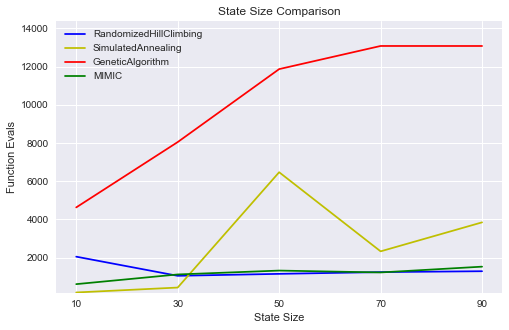

In [13]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments)
fig, ax = func_calls_comp.plot()

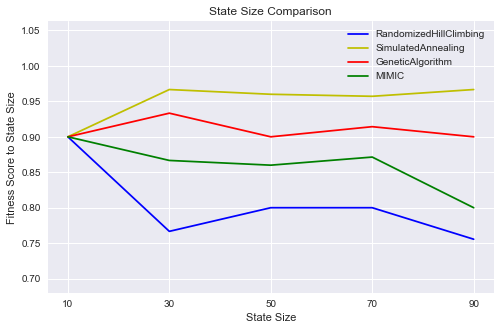

In [14]:
func_calls_state_size_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments, ratio="fitness")
fig, ax = func_calls_state_size_comp.plot()

In [53]:
max_iters_experiments = [
    FitnessValidationCurve(
        mod, 
        FlipFlop, 
        state_size=50,
        param_name='max_iters',
        param_range=np.array([1, 10, 100, 1000, 5000, 10000]),
        verbose=False
    ) for mod in [rand_hill_climb, sim_ann, gen_alg, mimic]
]
for exp in max_iters_experiments:
    exp.run()

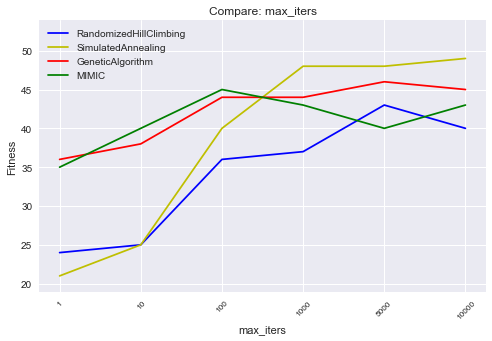

In [54]:
max_iters_comp = FitnessComparison(experiments=max_iters_experiments)
fig, ax = max_iters_comp.plot()

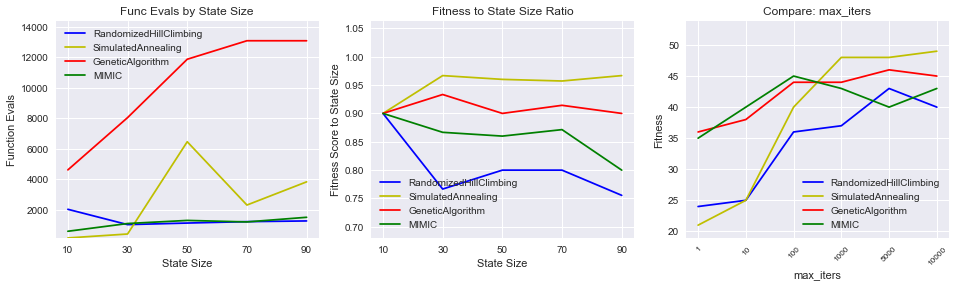

In [59]:
flip_flop_fig, axs = plt.subplots(1, 3, figsize=(16, 4))
_, ax = func_calls_comp.plot(ax=axs[0], title="Func Evals by State Size")
_, ax = func_calls_state_size_comp.plot(ax=axs[1], title="Fitness to State Size Ratio")
_, ax = max_iters_comp.plot(ax=axs[2])

In [60]:
flip_flop_fig.savefig(
    "../out/Flip Flop Results.png",  
    bbox_inches='tight',
    dpi=800
)

## Evaluations

In [49]:
problem = FlipFlop(state_size=50)
eval_experiments = [EvalOptimizationAlgorithm(model, problem, trials=5, verbose=True) for model in models]

In [50]:
for eval_exp in eval_experiments:
    eval_exp.fit()

1 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 42.0
	fit_time 0.05847811698913574
	func_calls 1153.0
	iterations 1146
2 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 41.0
	fit_time 0.055895090103149414
	func_calls 3329.0
	iterations 1133
3 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 39.0
	fit_time 0.05685901641845703
	func_calls 5556.0
	iterations 1143
4 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 42.0
	fit_time 0.05662727355957031
	func_calls 8990.0
	iterations 1170
5 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 40.0
	fit_time 0.05587887763977051
	func_calls 10085.0
	iterations 1085
<RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	Mean fitness: 40.8
	Mean Fit Time: 0.0567476749420166
	Mean Eval Func Calls: 5822.6
	Mean Iterations: 

In [48]:
for eval_exp in eval_experiments:
    eval_exp.fit()

1 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 165.0
	fit_time 0.23266196250915527
	func_calls 1452.0
2 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 166.0
	fit_time 0.226729154586792
	func_calls 5020.0
3 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 165.0
	fit_time 0.22161006927490234
	func_calls 8157.0
4 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 169.0
	fit_time 0.2327728271484375
	func_calls 13060.0
5 - <RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	best_fitness 174.0
	fit_time 0.28142309188842773
	func_calls 17087.0
<RandomizedHillClimbing, restarts: 1, max_attempts: 1000, max_iters: inf>:
	Mean fitness: 167.8
	Mean Fit Time: 0.23903942108154297
	Mean Eval Func Calls: 8955.2
1 - <SimulatedAnnealing, schedule: 5, max_attempts: 80, max_iters: inf>:
	best_fitness 193.0
	fit_t